In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
def generate_data(size, mean):
    identity = np.identity(2)
    m = np.random.multivariate_normal(mean, identity, 10)
    return np.array([
        np.random.multivariate_normal(random.choice(m), identity / 5)
        for _ in range(size)
    ])

Generate data

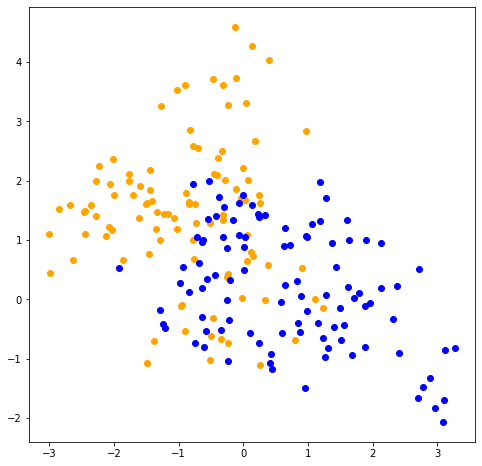

In [18]:
N = 100
blue_data = generate_data(N, [1, 0])
orange_data = generate_data(N, [0, 1])

data_x = np.r_[blue_data, orange_data]
data_y = np.r_[np.zeros(N), np.ones(N)]

# plotting
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(orange_data[:, 0], orange_data[:, 1], color = "orange")
ax.scatter(blue_data[:, 0], blue_data[:, 1], color = "blue")
plt.show()

Classification boundary Linear boundary

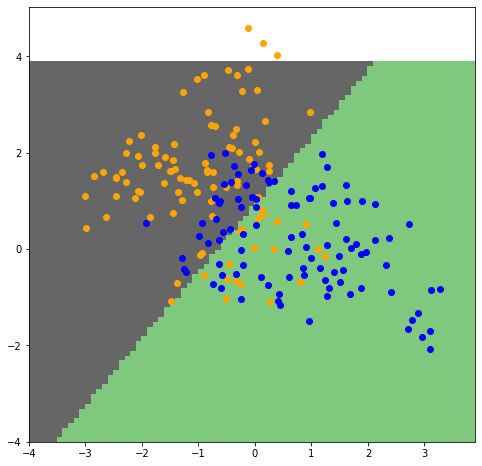

In [19]:
reg = LinearRegression()
reg.fit(y=data_y, X = data_x)

xx,yy = np.meshgrid(np.arange(-4,4, 0.1), np.arange(-4,4, 0.1))
Z = reg.predict(np.c_[(xx.ravel(),yy.ravel())])
Z[Z > 0.5] = 1
Z[Z <= 0.5] = 0
Z = Z.reshape(xx.shape)

# plotting
fig, ax = plt.subplots(figsize = (8, 8))
ax.pcolormesh(xx,yy,Z, cmap = "Accent")
ax.scatter(orange_data[:, 0], orange_data[:, 1], color = "orange")
ax.scatter(blue_data[:, 0], blue_data[:, 1], color = "blue")
plt.show()

Classification boundary KNN

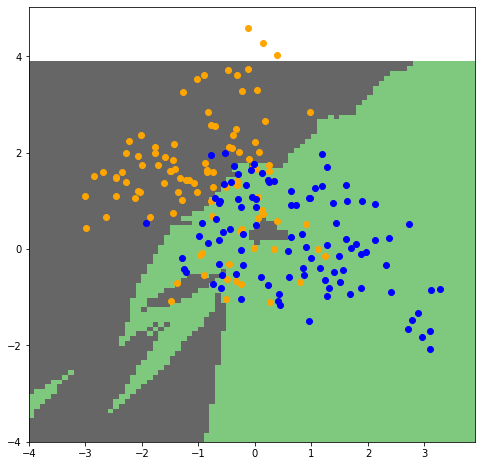

In [20]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(y = data_y, X = data_x)

xx,yy = np.meshgrid(np.arange(-4,4, 0.1), np.arange(-4,4, 0.1))
Z = knn.predict(np.c_[(xx.ravel(),yy.ravel())])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (8, 8))
ax.pcolormesh(xx,yy,Z, cmap = "Accent")
ax.scatter(orange_data[:, 0], orange_data[:, 1], color = "orange")
ax.scatter(blue_data[:, 0], blue_data[:, 1], color = "blue")
plt.show()

Classification boundary with Naive Bayes

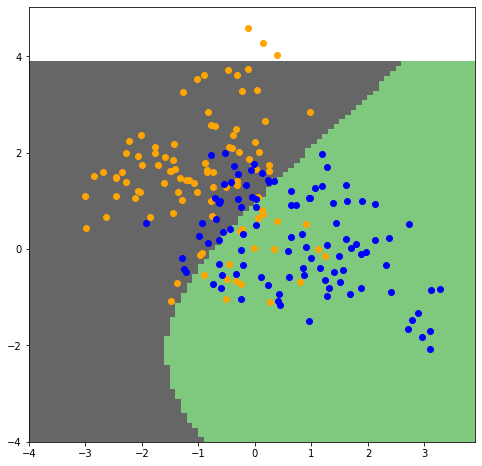

In [21]:
nb = GaussianNB()
nb.fit(y = data_y, X = data_x)

xx,yy = np.meshgrid(np.arange(-4,4, 0.1), np.arange(-4,4, 0.1))
Z = nb.predict(np.c_[(xx.ravel(),yy.ravel())])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (8, 8))
ax.pcolormesh(xx,yy,Z, cmap = "Accent")
ax.scatter(orange_data[:, 0], orange_data[:, 1], color = "orange")
ax.scatter(blue_data[:, 0], blue_data[:, 1], color = "blue")
plt.show()